In [7]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

#### read an image and convert colors to gray

In [8]:
# image from https://i.kym-cdn.com/photos/images/original/001/602/210/197.jpg  
# image file here  vvvvvvvv
#img = cv2.imread("D:/KMITL/Year 2/Season 2/Computer Graphic/Project/tiger-rex.jpg",)
img = cv2.imread("C:/Users/User/Downloads/cachedImage.jpg",)

img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
img = np.array(img)
img_dim = np.shape(img)
img_blur = cv2.GaussianBlur(img, (11,11), 0)

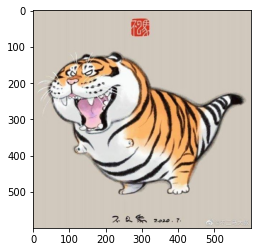

In [9]:
plt.imshow(img, cmap='gray')
plt.show()

#### edge detection using canny or sobel medthoid

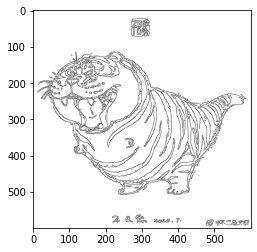

In [10]:
sobel = cv2.Sobel(src=img, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=1)
sobel_bin = np.where(sobel > 9, 1, 0)

canny = cv2.Canny(img,100,200)
# change range of number from [0,255] to [0,1] 
canny_bin = np.where(canny > 0, 1, 0)

plt.imshow(canny_bin, cmap='binary')

In [11]:
canny_bin

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### get java code of fillRect() here

In [12]:
dimy, dimx = img_dim

string = ''
i = 1
save = False
for y in range(dimy):
    for x in range(dimx):
        if canny_bin[y][x] == 1:
            if i % 4000 == 0 and save:
                file = open(f'fillRect_code_at{i}.txt', 'w')
                print(string, file = file)
                file.close()
                string = ''
            string += f"\t\tg.fillRect({x},{y},1,1);"
            i+=1
if(save):
    file = open(f'code{i}.txt', 'w')
    print(string, file = file)
    file.close()
            
print('//lined:', i)

ValueError: too many values to unpack (expected 2)

#### ploting line on image using hough line
### get java code of DrawLine() here

//lines: 10941


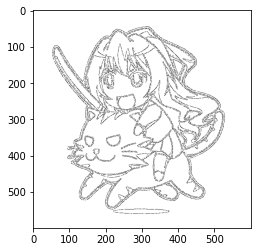

In [ ]:
# This returns an array of r and theta values
lines = cv2.HoughLinesP(canny,5,np.pi/360, 10, minLineLength=0.1)
lin_img = np.zeros(img_dim)

for line in lines:
    x1,y1,x2,y2 = line[0]
    lin_img = cv2.line(lin_img,(x1,y1), (x2,y2), 1)

print('//lines:',len(lines))
plt.imshow(lin_img, cmap= 'binary') 
plt.show()

In [ ]:
# The below for loop runs till r and theta values 
# are in the range of the 2d array
string = ''
i = 1
save = True
for line in lines:
    
    x1,y1,x2,y2 = line[0]
    
    if i%3000 == 0:
        file = open(f'DrawLine_code_at{i}.txt', 'w') if save else None
        str_fun_name = f'\tpublic void draw{i}(Graphics g) REPLACETHIS \n'
        print( str_fun_name+string+'\n\t}', file = file)
        file.close()
        string = ''
   
    string += f'\t\tDrawLine(g, {x1}, {y1}, {x2}, {y2});\n'
    lin_img = cv2.line(lin_img,(x1,y1), (x2,y2), 1)
    i += 1

file = open(f'DrawLine_code_at{i}.txt', 'w') if save else None
str_fun_name = f'public void draw{i}(Graphics g) REPLACETHIS \n'
print( str_fun_name + string + '\n\t}' , file = file)
file.close()

print(string)

		DrawLine(g, 158, 299, 158, 299);
		DrawLine(g, 449, 147, 449, 147);
		DrawLine(g, 497, 239, 497, 239);
		DrawLine(g, 350, 288, 350, 288);
		DrawLine(g, 390, 274, 390, 274);
		DrawLine(g, 353, 383, 353, 383);
		DrawLine(g, 356, 478, 356, 478);
		DrawLine(g, 447, 483, 447, 483);
		DrawLine(g, 286, 66, 289, 67);
		DrawLine(g, 353, 282, 353, 282);
		DrawLine(g, 211, 349, 212, 348);
		DrawLine(g, 394, 333, 394, 333);
		DrawLine(g, 290, 397, 290, 397);
		DrawLine(g, 359, 514, 359, 514);
		DrawLine(g, 400, 512, 401, 511);
		DrawLine(g, 177, 216, 177, 216);
		DrawLine(g, 312, 231, 312, 230);
		DrawLine(g, 224, 65, 227, 62);
		DrawLine(g, 294, 183, 294, 181);
		DrawLine(g, 316, 147, 316, 147);
		DrawLine(g, 274, 286, 275, 285);
		DrawLine(g, 421, 298, 421, 298);
		DrawLine(g, 111, 394, 111, 394);
		DrawLine(g, 272, 297, 272, 297);
		DrawLine(g, 441, 400, 442, 400);
		DrawLine(g, 377, 306, 377, 306);
		DrawLine(g, 312, 149, 312, 149);
		DrawLine(g, 305, 239, 305, 239);
		DrawLine(g, 250, 448, 

In [ ]:
def print_complete_code():
    print('\
          import javax.swing.JFrame;\
import javax.swing.JPanel;\
import java.awt.*;\
\
class GraphicsSwing extends JPanel {\
\
    public static void main(String[] args) {\
        GraphicsSwing m = new GraphicsSwing();\
\
        JFrame f = new JFrame();\
        f.add(m);\
        // f.setTitle();\
        // f.setDefaultCloseOperation(JFrame.EXIT_ON_CLOSE);\
        f.setSize(600, 600);\
        f.setVisible(true);\
    }\
\
    public void DDALine(Graphics g, int x0, int y0, int x1, int y1) {\
        // swap x0 and x1 if x0 > x1\
        int temp0 = x0;\
        int temp1 = x1;\
        x0 = Math.min(temp0, temp1);\
        x1 = Math.max(temp0, temp1);\
        // swap y0 and y1 if y0 > y1\
        temp0 = y0;\
        temp1 = y1;\
        y0 = Math.min(temp0, temp1);\
        y1 = Math.max(temp0, temp1);\
\
        float dx = x1 - x0;\
        float dy = y1 - y0;\
        // m is slope.\
        float m = dy / dx;\
        float _y = y0;\
        float _x = x0;\
\
        if (m <= 1) {\
\
            for (int xi = x0; xi <= x1; xi++) {\
                _y = _y + m;\
                g.setColor(Color.BLACK);\
                plot(g, xi, (int) Math.round(_y));\
            }\
        } else if (m > 1) {\
\
            for (int yi = y0; yi <= y1; yi++) {\
                _x = _x + 1 / m;\
                g.setColor(Color.BLACK);\
                plot(g, (int) Math.round(_x), yi);\
            }\
        }\
    }\
\
    public void plot(Graphics g, int x, int y) {\
        g.fillRect(x, y, 1, 1);\
    }\
\
    // paint geomaetry components\
    public void paintComponent(Graphics g) {\
        Color Black = new Color(0,0,0);\
        g.setColor(Black);\
          \
          ')